In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv

In [2]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=0a210e676b91b03bac7df2e4fc142fcee76204da60f1055519332623eaf9106e
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [3]:
from apyori import apriori

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')

In [5]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
df.shape

(38765, 3)

In [9]:
df.size

116295

In [10]:
df.ndim

2

In [11]:
# Q1 Which of the items are the top 10 selling item?
df.itemDescription.value_counts().head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

Text(0.5, 1.0, 'Top 10 Selling items')

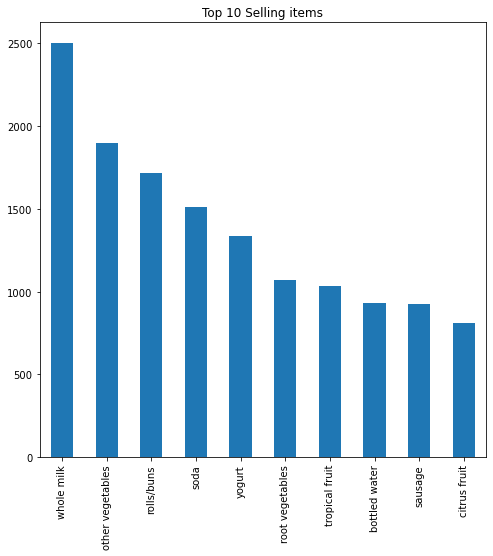

In [13]:
plt.figure(figsize=(8,8))
df.itemDescription.value_counts().head(10).plot.bar()
plt.title('Top 10 Selling items')

In [15]:
# Q2 Which of the items are the 10 least selling items?
df.itemDescription.value_counts().tail(10).sort_values()

kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64

Text(0.5, 1.0, 'Top 10 Selling items')

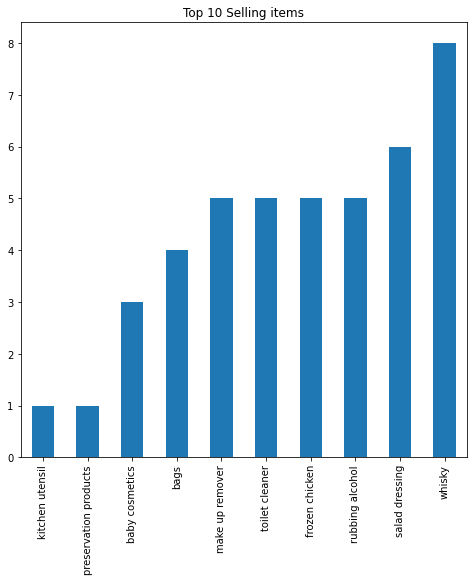

In [16]:
plt.figure(figsize=(8,8))
df.itemDescription.value_counts().tail(10).sort_values().plot.bar()
plt.title('Top 10 Selling items')

In [17]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [18]:
#Q3 Top 10 Customers
df.Member_number.value_counts().head(10)


3180    36
3050    33
2051    33
3737    33
2433    31
3915    31
2625    31
2271    31
3872    30
2394    29
Name: Member_number, dtype: int64

Text(0.5, 1.0, 'Top 10 Customers')

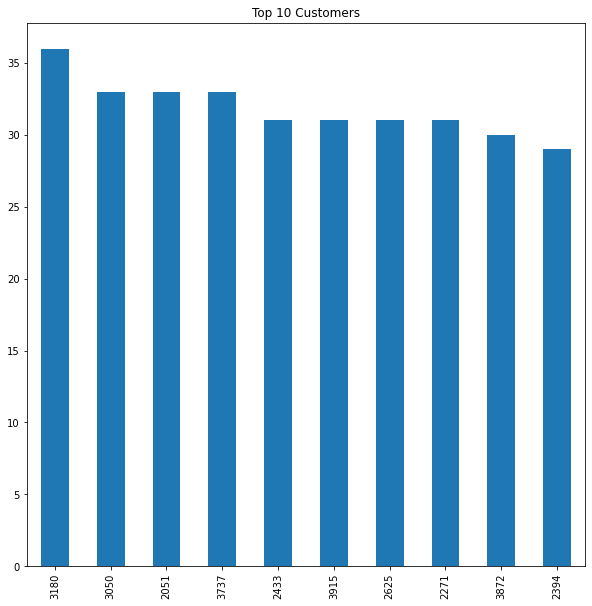

In [19]:
plt.figure(figsize=(10,10))
df.Member_number.value_counts().head(10).plot.bar()
plt.title('Top 10 Customers')


In [20]:
df.head(2)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk


In [21]:
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day

In [22]:
df.head(2)

,Member_number,Date,itemDescription,year,month,day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [24]:
#Q4 In which year, the majority of the transactions has happened?
df.year.value_counts()

2015    20488
2014    18277
Name: year, dtype: int64

In [25]:
df.month.value_counts()

8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: month, dtype: int64

In [26]:
df.day.value_counts()

28    1375
21    1354
26    1351
8     1349
13    1341
14    1341
27    1327
10    1308
4     1308
11    1297
24    1290
5     1290
18    1285
23    1277
7     1277
19    1272
22    1272
9     1271
2     1252
1     1250
15    1245
3     1243
6     1232
25    1229
20    1214
30    1201
17    1181
12    1179
16    1158
29    1124
31     672
Name: day, dtype: int64

In [28]:
df[df.year==2015]['month'].value_counts().sort_index()


1     1829
2     1485
3     1792
4     1666
5     1710
6     1791
7     1645
8     1963
9     1613
10    1663
11    1777
12    1554
Name: month, dtype: int64

# Aprori Implementation

In [29]:
df.head(2)

,Member_number,Date,itemDescription,year,month,day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [30]:
data =df.copy()
data1 = data.copy()

In [32]:
data = pd.get_dummies(data['itemDescription'])

In [33]:
data.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
data1.drop(['itemDescription'],axis=1,inplace=True)

In [35]:
data1 = data1.join(data)

In [36]:
data1.head()

,Member_number,Date,year,month,day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,9,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
products = df['itemDescription'].unique()

In [38]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [40]:
data2 = data1.groupby(['Member_number','Date'])[products[:]].sum()

In [39]:
data1.groupby(['Member_number','Date'])[products[:]].sum()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   
...                                  ...         ...        ...   
4999          24-01-2015               1           0          0   
              26-12-2015               0           0          0   
5000          09-03-2014               0           0          0   
              10-02-2015               0           0          0   
              16-11-2014               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   
...                                    ...         ...         ...   
4999          24-01-2015                 1           0           0   
              26-12-2015                 0           0           0   
5000          09-03-2014                 0           0           0   
              10-02-2015                 0           0           0   
              16-11-2014                 1           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   
...                                ...   ...          ...      ...  ...   
4999          24-01-2015             0     0            0        0  ...   
              26-12-2015             0     0            0        0  ...   
5000          09-03-2014             0     0            0        0  ...   
              10-02-2015             0     0            0        0  ...   
              16-11-2014             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   
...                                  ...   ...  ...             ...   
4999          24-01-2015               0     0    0               0   
              26-12-2015               0     0    0               0   
5000          09-03-2014               0     0    0               0   
              10-02-2015               0     0    0               0   
              16-11-2014               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015   

In [41]:
data2.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [42]:
data2 = data2.reset_index()[products]

In [43]:
data2

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
data2.values

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [45]:
data2['tropical fruit']

0        0
1        0
2        0
3        0
4        0
        ..
14958    1
14959    0
14960    0
14961    0
14962    0
Name: tropical fruit, Length: 14963, dtype: uint8

In [46]:
def funct(data):
    for i in products:
        if data[i]>0:
            data[i]=i
    return data

In [49]:
data2 = data2.apply(funct,axis=1)

In [50]:
data2.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
newdata= data2.values

In [52]:
newdata

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [53]:
newdata.ndim

2

In [54]:
newdata = [i[i!=0].tolist() for i in newdata if i[i!=0].tolist()]

In [55]:
newdata[:10]

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

# Apriori Implementation

In [62]:
association = apriori(newdata,min_support=0.0003,min_confidence=0.05,max_length=3,min_lift=3)

In [63]:
result = list(association)

In [64]:
result

[RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'ham', 'pickled vegetables'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'meat', 'roll products '}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'roll products '}), items_add=frozenset({'meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 RelationRecord(items=frozenset({'salt', 'misc. beverages'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'misc. beverag

In [66]:
type(result[1])

apyori.RelationRecord

In [67]:
result[1]

RelationRecord(items=frozenset({'ham', 'pickled vegetables'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)])

Itemset = {'ham','picked vegetables'}
association rule- pickled vegetables-> ham
confidence= 0.05970149253731344